# Jäitten lähdön ajankohdan ennustaminen lineaarisen regressiomallin avulla

## Johdanto
Tämä Jupyter-työkirja esittelee yksinkertaisen esimerkin jäitten lähdön ajankohdan ennustamisesta käyttäen suoraviivaista taantumamallia (lineaarista regressiomallia). Käytettävä tieto on kerätty vuosien saatossa, ja sitä esikäsitellään ennen mallin sovittamista dataan ja ennusteiden tekemistä.

Tallentamalla seuraavan tekstin tiedostoon icetimes.csv saa muistikirjan toimimaan:

Year,Day_in_April
2012,23
2013,20
2014,21
2015,24
2016,23
2017,29
2018,21
2019,16
2020,16
2021,13
2022,22
2023,22


## 1. Aineiston kerääminen ja esikäsittely

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # for later updates
from sklearn.linear_model import LinearRegression
from scipy import stats

# Read data from a CSV file
data = pd.read_csv('icetimes.csv')

# Extract information from the data
X = data['Year'].values.reshape(-1, 1)  # Year should be the feature
y = data['Day_in_April'].values  # Day in April is the target variable


## 2. Mallin sovitus ja ennusteiden luominen


In [2]:
# Fit linear regression model
model = LinearRegression().fit(X, y)

# Create redictions
predictions = model.predict(X)

## 3. Luottamusvälien laskeminen


In [3]:
# Confidence intervals
confidence_095 = 0.95
squared_errors = np.sum((model.predict(X) - y) ** 2)
standard_error = np.sqrt(squared_errors / (len(X) - 2))
t_score_095 = stats.t.ppf(1 - (1 - confidence_095) / 2, len(X) - 2)
margin_of_error_095 = t_score_095 * standard_error

# Upper and lower bounds for 95% confidence interval
upper_095 = predictions + margin_of_error_095
lower_095 = predictions - margin_of_error_095

# Confidence intervals for 0.69
confidence_069 = 0.69
t_score_069 = stats.t.ppf(1 - (1 - confidence_069) / 2, len(X) - 2)
margin_of_error_069 = t_score_069 * standard_error

# Upper and lower bounds for 0.69 confidence interval
upper_069 = predictions + margin_of_error_069
lower_069 = predictions - margin_of_error_069

## 4. Tulosten havainnollistaminen


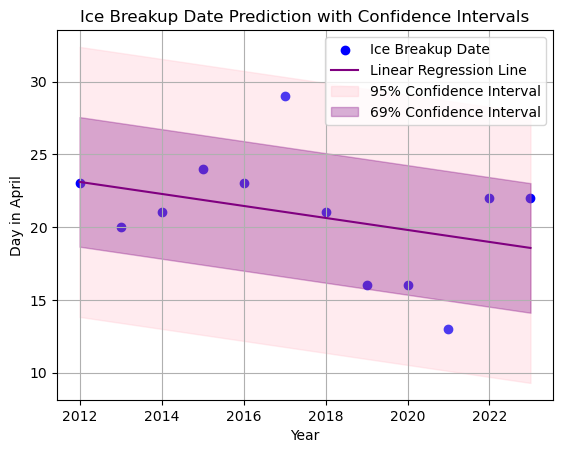

In [4]:
# Visualization
plt.scatter(data['Year'], data['Day_in_April'], color='blue', label='Ice Breakup Date')
plt.plot(data['Year'], predictions, color='purple', label='Linear Regression Line')
plt.fill_between(data['Year'], lower_095, upper_095, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(data['Year'], lower_069, upper_069, color='purple', alpha=0.3, label='69% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Day in April')
plt.title('Ice Breakup Date Prediction with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

## 5. Tehtävälista

# Todo:
  - Karkauspäivät
  - Vuoden x. päivä huhtikuun sijasta
  - Kellonajan huomioiminen
  - Ehkä date import, mieluummin ei riippuvuuksia
  - Automatisointi datan jalostamiseen
  - Tiedostotyypeistä lukeminen: taulukkolaskenta, txt
  - Kauniimpi kuvaaja, esim Seaborn


## Yhteenveto
Tässä työkirjassa esiteltiin yksinkertainen esimerkki jäitten lähdön ajankohdan ennustamisesta käyttäen lineaarista regressiomallia. 
Aineisto kerättiin paperilla ja kynällä vuosien saatossa. Alkuperäisessä aineistossa oli kaksi puuttuvaa vuotta 2014 ja 2018, ne korvattiin aineiston keskiarvolla (21.4.). Puolet merkinnöistä sisälsi kellonajan, ja pari mainintaa jäiden sulamisesta paikalleen tavallisen irtoamisen sijaan. Kellonajat jätettiin vielä huomiotta. Jäidenlähtömenetelmää ei huomioitu, sillä pyritään ennakoimaan ajankohtaa, ei tyyppiä (jonka selvittäminen vaatisi tutkimustyötä).

Sitten sovitettiin malli dataan ja luotiin ennusteet. Lopuksi tulokset näytetään kuvaajana.